In [1]:
#using MKL
using Distributed
using SparseArrays
using SharedArrays
using Arpack
using KrylovKit
using LaTeXStrings
using DelimitedFiles
using PyPlot
using Combinatorics
using Statistics
using ThreadTools
using Base.Threads
using LinearAlgebra
using JLD
using ForwardDiff

In [16]:
 begin
    function Rot(θ)
        return [cos(θ) -sin(θ); sin(θ) cos(θ)]
    end
    M = 6 #cutoff
    Mlist = [[i,j]-[M+1,M+1] for i in 1:2*M+1 for j in 1:2*M+1]  
#=     θdeg = 4.0 #degrees
    θ = θdeg*(pi/180)
    a0 = 3.52 #A
    a0 = a0*10^(-1) #nm
    aM = a0/(2*sin(θ)/2) =#
    aM = 1.0 #nm
    prefactor = 495 #meV*A^2
    meff = 1.0 #effective mass
    dMBZ = (4*pi/(3*aM))
    const hbar = 4.135667 * 10^(3)* 10^(-15) / 2 / pi  # meV* second
    const me = 0.51099895 * 10^(3) * 10^(6) #meV/c^2
    m_eff = meff * me
    kin = hbar^2 / 2 / m_eff * 9 * 10^(16)
    kin = (kin/(1*10^-18)) #meV*nm^2
    const esquare = (1.602176634*10^(-19))^2
    const epsilon_0 = 8.8541878128*10^(-12)
    b1 = (4*pi/(sqrt(3)*aM))*[1,0]
    b2 = Rot(pi/3)*b1
    b3 = Rot(2*pi/3)*b1
    b4 = Rot(3*pi/3)*b1
    b5 = Rot(4*pi/3)*b1
    b6 = Rot(5*pi/3)*b1
    G1 = b1
    G2 = b2
    blist = [b1,b2,b3,b4,b5,b6]
    sigmax = [0 1; 1 0]
    sigmay = [0 -im; im 0]
    sigmaz = [1 0; 0 -1]
"""    G11=dMBZ*[1,0]
    G22=dMBZ*[0.5,sqrt(3)/2]
    G33=dMBZ*[-0.5,sqrt(3)/2]
    G44=dMBZ*[-1,0]
    G55=dMBZ*[-0.5,-sqrt(3)/2]
    G66=dMBZ*[0.5,-sqrt(3)/2]"""
    a1 = aM*[sqrt(3)/2,-1/2]
    a2 = aM*[0,1]
    function find_U0(epsilon,aM)
      U0 = esquare/(4*pi*epsilon*epsilon_0*(aM))
      return U0*(6.241509*10^(18))
    end
    V0 = 0.0
    phi = 0.0
    phi2 = 0.0
    λ_0 = -0.23 #dimensionless parameter (not to be confused with λ in my notes)
    Alist = [[(im*b[2]),(-im*b[1])] for b in blist]
    phi2list = [phi2,-phi2,phi2,-phi2,phi2,-phi2]
end 

#=     M = 8 # cutoff
    Mlist = [[i, j] - [M+1, M+1] for i in 1:2*M+1 for j in 1:2*M+1]  
#=     θdeg = 4.0 # degrees
    θ = θdeg*(pi/180)
    a0 = 3.52 # A
    a0 = a0*10^(-1) # nm
    aM = a0/(2*sin(θ)/2) =#
    aM = 1.0 # nm
    prefactor = ComplexF32(495) # meV*A^2
    meff = ComplexF32(1.0) # effective mass
    dMBZ = ComplexF32(4*pi/(3*aM))
    const hbar = ComplexF32(4.135667 * 10^(3) * 10^(-15) / 2 / pi)  # meV* second
    const me = ComplexF32(0.51099895 * 10^(3) * 10^(6)) # meV/c^2
    m_eff = ComplexF32(meff * me)
    kin = ComplexF32(hbar^2 / (2 * m_eff) * 9 * 10^(16))
    kin = ComplexF32(kin / (1 * 10^-18)) # meV*nm^2
    const esquare = ComplexF32((1.602176634 * 10^(-19))^2)
    const epsilon_0 = ComplexF32(8.8541878128 * 10^(-12))
    b1 = ComplexF32(4*pi/(sqrt(3)*aM)) * [ComplexF32(1), ComplexF32(0)]
    b2 = Rot(pi/3) * b1
    b3 = Rot(2*pi/3) * b1
    b4 = Rot(3*pi/3) * b1
    b5 = Rot(4*pi/3) * b1
    b6 = Rot(5*pi/3) * b1
    G1 = b1
    G2 = b2
    blist = [b1, b2, b3, b4, b5, b6]
    sigmax = ComplexF32[0 1; 1 0]
    sigmay = ComplexF32[0 -im; im 0]
    sigmaz = ComplexF32[1 0; 0 -1]
"""    G11 = dMBZ * [1, 0]
    G22 = dMBZ * [0.5, sqrt(3)/2]
    G33 = dMBZ * [-0.5, sqrt(3)/2]
    G44 = dMBZ * [-1, 0]
    G55 = dMBZ * [-0.5, -sqrt(3)/2]
    G66 = dMBZ * [0.5, -sqrt(3)/2]"""
    a1 = ComplexF32.(aM * [sqrt(3)/2, -1/2])
    a2 = ComplexF32.(aM * [0, 1])
    function find_U0(epsilon, aM)
        U0 = ComplexF32(esquare / (4 * pi * epsilon * epsilon_0 * aM))
        return ComplexF32(U0 * (6.241509 * 10^(18)))
    end
    V0 = ComplexF32(0.0) # meV
    phi = ComplexF32(0.0)
    λ_0 = ComplexF32(0.125) # dimensionless parameter (not to be confused with λ in my notes)
    Alist = [[ComplexF32(im * b[2]), ComplexF32(-im * b[1])] for b in blist]
end =#



6-element Vector{Float64}:
  0.0
 -0.0
  0.0
 -0.0
  0.0
 -0.0

In [17]:
function A_vec(r)
  Ax = 0.0
  Ay = 0.0
  for i in eachindex(Alist)
    Ax += Alist[i][1]*exp(im*dot(blist[i],r)+im*phi2list[i])
    Ay += Alist[i][2]*exp(im*dot(blist[i],r)+im*phi2list[i])
  end
  return [Ax,Ay]
end
function fourier_comp(q,r)
    return exp(-im*dot(q,r))*dot(A_vec(r),A_vec(r))
end
momentumfouriergrid = Vector{ComplexF64}(undef,(2*M+1)^2)
numx = 150
numy = 150
A_UC = abs(a1[1]*a2[2]-a2[1]*a1[2])
dA=A_UC/(numx)^2
rlist =[i*(a1/numx)+j*(a2/numy) for i in 1:numx for j in 1:numy]
for m in -M:M 
  for n in -M:M 
    p = (n+M) + (m+M)*(2*M+1) +1
    qvector = m*b1 + n*b2
    val = 0.0 + 0.0*im
    for i in eachindex(rlist)
        val += fourier_comp(qvector,rlist[i])
    end
    momentumfouriergrid[p] = val*(dA)/A_UC
  end
end

In [23]:
function Ham(k)
    H = zeros(ComplexF64,(2*M+1)^2,(2*M+1)^2)
    for m in -M:M
        for n in -M:M
            p = (n+M) + (m+M)*(2*M+1) +1
            kt = (k +m*b1 + n*b2)
             H[p,p] += (kin)*norm(kt)^2 
            if m != M
                x = (n+M) + (m+1+M)*(2*M+1) +1 #b1 #b1 = b2 - b3
                H[x,p] += V0*exp(im*phi) + (2*kin*λ_0)*dot(kt +b1,Alist[1])*exp(im*phi2list[1])
            end
            if n != -M #b5 = -b2
                x = (n-1+M) + (m+M)*(2*M+1) +1 #b5 = -b2 #b2 = -b1 - b3
                H[x,p] += V0*exp(im*phi)  + (2*kin*λ_0)*dot(kt -b2,Alist[5])*exp(im*phi2list[5])
            end           
            if n != M && m != -M #b3 = -b1+b2
                x = (n+1+M) + (m-1+M)*(2*M+1) +1 #b3 = -b1+b2  #b3 = -b1+b2
                H[x,p] += V0*exp(im*phi) + (2*kin*λ_0)*dot(kt -b1 + b2,Alist[3])*exp(im*phi2list[3])
            end
            if m != -M
                x = (n+M) + (m-1+M)*(2*M+1) +1 #b4 = -b1 #b4 = -b2 + b3
                H[x,p] += V0*exp(-im*phi) + (2*kin*λ_0)*dot(kt -b1 ,Alist[4])*exp(im*phi2list[4])
            end
            if n != M 
                x = (n+1+M) + (m+M)*(2*M+1) +1 #b2 #b2 = b1 +b3
                H[x,p] += V0*exp(-im*phi)  + (2*kin*λ_0)*dot(kt + b2,Alist[2])*exp(im*phi2list[2])
            end
            if n != -M && m != M #b6 = b1 -b2 #b6 = b1 -b2
                x = (n-1+M) + (m+1+M)*(2*M+1) +1 
                H[x,p] += V0*exp(-im*phi)  +  (2*kin*λ_0)*dot(kt +b1 - b2,Alist[6])*exp(im*phi2list[6])
            end
            ########
#=             if m != M
                x = (n+M) + (m+1+M)*(2*M+1) +1 #b1
                H[p,x] +=  (kin*λ_0)*dot((k +(m+1)*b1 + n*b2),Alist[4]) 
            end
            if n != -M #b5 = -b2
                x = (n-1+M) + (m+M)*(2*M+1) +1 #b5 = -b2
                H[p,x] += (kin*λ_0)*dot((k +m*b1 + (n-1)*b2),Alist[2]) 
            end           
            if n != M && m != -M #b3 = -b1+b2
                x = (n+1+M) + (m-1+M)*(2*M+1) +1 #b3 = -b1+b2
                H[p,x] += (kin*λ_0)*dot((k +(m-1)*b1 + (n+1)*b2),Alist[6]) 
            end
            if m != -M
                x = (n+M) + (m-1+M)*(2*M+1) +1 #b4 = -b1
                H[p,x] +=  (kin*λ_0)*dot((k +(m-1)*b1 + n*b2),Alist[1]) 
            end
            if n != M 
                x = (n+1+M) + (m+M)*(2*M+1) +1 #b2
                H[p,x] +=  (kin*λ_0)*dot((k +m*b1 + (n+1)*b2),Alist[5])
            end
            if n != -M && m != M #b6 = b1 -b2
                x = (n-1+M) + (m+1+M)*(2*M+1) +1 
               H[p,x] += (kin*λ_0)*dot((k +(m+1)*b1 + (n-1)*b2),Alist[3]) 
            end =#
            ##############
             for m1 in -M:M 
              for n1 in -M:M 
                  x = (n-n1+M) + (m-m1+M)*(2*M+1) +1
                  y = (n1+M) + (m1+M)*(2*M+1) +1
                #  @show x
                  if x <= (2*M+1)^2 && x >= 1
                      H[x,p] += kin*(λ_0^2)*momentumfouriergrid[y]
                  end
              end
            end    
        end
    end
    return Hermitian(H)
end
function Ham2(k)
    H = zeros(ComplexF64,(2*M+1)^2,(2*M+1)^2)
    for m in -M:M
        for n in -M:M
            p = (n+M) + (m+M)*(2*M+1) +1
            kt = (k +m*b1 + n*b2)
            H[p,p] += (-kin)*norm(kt)^2 
            if m != M
                x = (n+M) + (m+1+M)*(2*M+1) +1 #b1
                H[x,p] += V0*exp(im*phi)
            end
            if n != -M
                x = (n-1+M) + (m+M)*(2*M+1) +1 #b5 = -b2
                H[x,p] += V0*exp(im*phi)
            end           
            if n != M && m != -M
                x = (n+1+M) + (m-1+M)*(2*M+1) +1 #b3 = -b1+b2
                H[x,p] += V0*exp(im*phi)
            end
            if m != -M
                x = (n+M) + (m-1+M)*(2*M+1) +1 #b4 = -b1
                H[x,p] += V0*exp(-im*phi)
            end
            if n != M 
                x = (n+1+M) + (m+M)*(2*M+1) +1 #b2
                H[x,p] += V0*exp(-im*phi)
            end
            if n != -M && m != M
                x = (n-1+M) + (m+1+M)*(2*M+1) +1 #b6 = b1-b2
                H[x,p] += V0*exp(-im*phi)
            end
        end
    end
    return Hermitian(H)
end

Ham2 (generic function with 1 method)

In [8]:
#Plotting the spectrum along a symmetry cut ( kplus' - gamma - kplus- kplus')
kplus2 = dMBZ*[sqrt(3)/2,-1/2]
gamma = dMBZ*[0,0]
kminus1 = dMBZ*[-sqrt(3)/2,1/2]
kplus1 = dMBZ*[-sqrt(3)/2,-1/2]
Mpt = 0.5*G1
N1 = 50
N2 = 50
dx = (kplus2[1]-gamma[1])/N1
dy = (kplus2[2]-gamma[2])/N1
klist = [[0,0]]
for i in 0:N1
    kx = gamma[1] + i*dx
    ky = gamma[2]+ i*dy
    kpoint = [kx,ky]
    klist = vcat(klist,[kpoint])
end
klist = klist[2:length(klist)]
dx = (Mpt[1]-kplus2[1])/N1
dy = (Mpt[2]-kplus2[2])/N1
for i in 0:N1
    kx = kplus2[1] + i*dx
    ky = kplus2[2] +i*dy
    kpoint = [kx,ky]
    klist = vcat(klist,[kpoint])
end
dx = (gamma[1]-Mpt[1])/N1 
dy = (gamma[2]-Mpt[2])/N1
for i in 0:N1
    kx = Mpt[1] + i*dx
    ky = Mpt[2] +i*dy
    kpoint = [kx,ky]
    klist = vcat(klist,[kpoint])
end
dx = (kplus1[1]-gamma[1])/N1
dy = (kplus1[2]-gamma[2])/N1
for i in 0:N1
    kx = gamma[1] + i*dx
    ky = gamma[2] + i*dy
    kpoint = [kx,ky]
    klist = vcat(klist,[kpoint])
end
spectrum = [0 0]
for i in eachindex(klist)
    eiglist = eigvals(Ham(klist[i]), 1: 7)
    ind = fill(i,length(eiglist))
    list = hcat(eiglist,ind)
    spectrum = vcat(spectrum,list)
end
spectrum = spectrum[2:end,:]

1428×2 Matrix{Float64}:
  118.583    1.0
 1442.14     1.0
 1564.39     1.0
 1948.72     1.0
 2109.53     1.0
 2580.86     1.0
 2746.31     1.0
  118.815    2.0
 1438.97     2.0
 1566.54     2.0
    ⋮      
 2704.87   203.0
 4097.62   203.0
  508.873  204.0
  820.935  204.0
  854.136  204.0
 2528.39   204.0
 2672.57   204.0
 2672.7    204.0
 4108.08   204.0

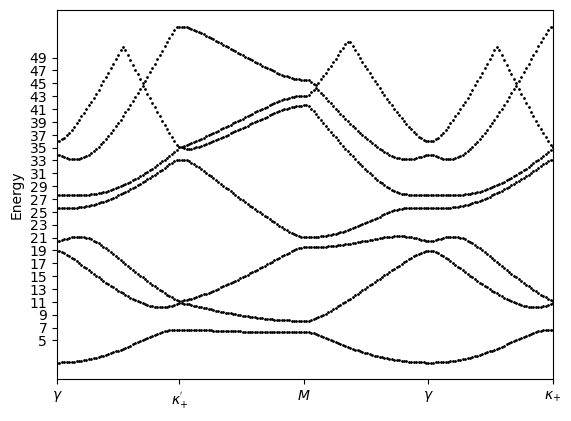

In [9]:
rc("text",usetex="false")
close("all")
scatter(spectrum[:,2],spectrum[:,1]/(2*kin),s=1,c="black")
#scatter(valencespectrum[:,2],valencespectrum[:,1],s=15,c="r")
#ylim(0.037,0.039)
xlim(1,204)
#ylim(-30,-10)
#title(string(L"$\theta = $",θdeg,L"$^\circ$",",",L" $U = $",round(Vz*10^3,digits=4),L"\> \rm meV"),size = 15)
#ylim(12,22)
ylabel("Energy")
xtickslist = [1,51,102,153,204]
my_xticks = [L"$\gamma$",L"$\kappa_{+}^{'}$",L"$M$",L"$\gamma$",L"$\kappa_{+}$"]
xticks(xtickslist,my_xticks)
yticks(5:2:50)
#text(100,25.5,L"C = -1 ",size = 12)
#text(100,21.5,L"C = 1 ",size = 12)()
display(gcf())
#savefig("zerofield.pdf")

In [33]:
71.99822735797586/(2*kin)

0.9435565069514709

In [24]:
function lattice(a,b,c,d)
    return [a b; c d]
end
function g1g2(lattice,G1,G2)
    a = lattice[1,1]
    b = lattice[1,2]
    c = lattice[2,1]
    d = lattice[2,2]
    size = abs(det(lattice))
    sgn = sign(det(lattice))
    g1 = (1/size)*(d*sgn*G1 - c*sgn*G2)
    g2 = (1/size)*(-b*sgn*G1 + a*sgn*G2)
    return g1,g2,sgn*G1,sgn*G2,sgn
end
#k-space momentum points
function kpoints(lattice)
    a = lattice[1,1]
    b = lattice[1,2]
    c = lattice[2,1]
    d = lattice[2,2]
    limit = abs(det(lattice))
   # if b != 0 && c != 0
    xlist = []
    ylist = []
    for x in -limit:limit
        for y in -limit:limit
            if d*x-b*y >= ceil(-limit/2) && d*x-b*y <= ceil(limit/2)-1 && -c*x+a*y >= ceil(-limit/2) && -c*x+a*y <= ceil(limit/2)-1
                push!(xlist,x)
                push!(ylist,y)
            end
        end
    end
    klabel = [[xlist[i],ylist[i]] for i in eachindex(xlist)]
    return klabel
end
function mn_with_flux(k,g1,g2,phi1,phi2) #Gives the discretized momenta with inserted flux
    k = (k[1]+phi1)*g1 + (k[2]+phi2)*g2
    return k
end

mn_with_flux (generic function with 1 method)

In [25]:
klattice = [3 0 ; 0 3]
g1,g2, = g1g2(klattice,G1,G2)
klabel = kpoints(klattice)
kpts = [mn_with_flux(klabel[i],g1,g2,0,0) for i in eachindex(klabel)]

9-element Vector{Vector{Float64}}:
 [-3.6275987284684357, -2.0943951023931953]
 [-2.4183991523122903, 0.0]
 [-1.209199576156145, 2.0943951023931953]
 [-1.2091995761561454, -2.0943951023931953]
 [0.0, 0.0]
 [1.2091995761561454, 2.0943951023931953]
 [1.209199576156145, -2.0943951023931953]
 [2.4183991523122903, 0.0]
 [3.6275987284684357, 2.0943951023931953]

In [26]:
energylist = []
for kpt in kpts
    push!(energylist,eigvals(Ham(kpt), 1 : 1)[1])
end

In [27]:
sum(sort(energylist)[1:2])/(2*kin)

14.362768458085721

# Chern Number

In [12]:
function build_U(vec1,vec2)
    in_product = dot(vec2,vec1)
    U = in_product/abs(in_product)
    return U
end
function latF(k_vec,Dk)
    """calulate lattice field using the definition: F12 = ln[
    U1 * U2(k+1) * U1(k_2)^-1 * U2(k)^-1 ] for each
    k=(kx,ky) point, four U must be calculated.  The lattice
    field has the same dimension of the number of energy
    bands.
    
    input:
    ------
    k_vec:vec(2), float, (kx,ky).
    Dk: vec(2), float, (Dkx,Dky),
    dim:integer,  dim of H(k)
    
    return:
    -------
    F12:vec(dim), complex, lattice field corresponding to each band.
    E_sort: vec(dim) float, eigenenergies.
    """

    k = k_vec
    E = eigen(Ham(k), 1:3)
    #E=E[0:4]
    #aux=aux[:,0:4]
    #idx = E.argsort()
    #psi = aux[:,idx]
    psi = E.vectors

    k = [k_vec[1]+Dk[1], k_vec[2]]
    E = eigen(Ham(k), 1:3)
    #E=E[0:4]
    #aux=aux[:,0:4]
    #idx = E.argsort()
    #psiDx = aux[:,idx]
    psiDx = E.vectors

    k = [k_vec[1], k_vec[2]+Dk[2]]
    E =eigen(Ham(k), 1:3)
    #E=E[0:4]
    #aux=aux[:,0:4]
    #idx = E.argsort()
    #psiDy = aux[:,idx]
    psiDy = E.vectors

    k = [k_vec[1]+Dk[1], k_vec[2]+Dk[2]]
    E =eigen(Ham(k), 1:3)
    #E=E[0:4]
    #aux=aux[:,0:4]
    #idx = E.argsort()
    #psiDxDy = aux[:,idx]
    psiDxDy = E.vectors
    
    dim=3
    
    U1x = zeros(ComplexF64,dim)
    U2y = zeros(ComplexF64,dim)
    U1y = zeros(ComplexF64,dim)
    U2x = zeros(ComplexF64,dim)

    for i in 1:3
        U1x[i] = build_U(psi[:,i], psiDx[:,i])
        U2y[i] = build_U(psi[:,i], psiDy[:,i])
        U1y[i] = build_U(psiDy[:,i], psiDxDy[:,i])
        U2x[i] = build_U(psiDx[:,i], psiDxDy[:,i])
    end

    F12 = zeros(ComplexF64,dim)

    F12 = U1x .* U2x .* (1 ./U1y) .* (1 ./U2y)

    return log.(F12)
end
function chern()

    x_res = 20
    kx_int = -(sqrt(3)/2)*dMBZ
    kx_fin = (sqrt(3)/2)*dMBZ
    
    Dx = (kx_fin - kx_int)/x_res
    y_res = 20
    ky_int = -(3/4)*dMBZ
    ky_fin = (3/4)*dMBZ
    
    Dy = (ky_fin - ky_int)/y_res
    
    Nd = 3
    Dk = [Dx,Dy]
    
    LF = zeros(ComplexF64,Nd)
    sumN = zeros(ComplexF64,Nd)
    chernN = zeros(ComplexF64,Nd)
    # Loop over kx
    for ix in 0:x_res-1
        kx = kx_int + ix*Dx
        # Loop over ky
        for iy in 0:y_res-1
            ky = ky_int + iy*Dy
            k_vec = [kx,ky]
           # k_list=vcat((k_list,k_vec))
            LF= latF(k_vec, Dk)
            sumN += LF
        end
    end
    chernN = imag(sumN) /(2*pi)
end
chernN = chern()
#writedlm("chernN.txt",chernN)


3-element Vector{Float64}:
  0.9999999999999813
 -1.99999999999995
  0.9999999999998319

In [13]:
function berrycurvature()
    x_res = 40
    kx_int = -dMBZ
    kx_fin = dMBZ
    
    Dx = (kx_fin - kx_int)/x_res
    y_res = 40
    ky_int = -dMBZ
    ky_fin = dMBZ
    
    Dy = (ky_fin - ky_int)/y_res
    
    Nd = 1 
    Dk = [Dx,Dy]
    curvlist = [0 0 0]
    # Loop over kx
    for ix in 0:x_res-1
        kx = kx_int + ix*Dx
        # Loop over ky
        for iy in 0:y_res-1
            ky = ky_int + iy*Dy
            k_vec = [kx,ky]
           # k_list=vcat((k_list,k_vec))
            LF= latF(k_vec, Dk)
            curvlist = vcat(curvlist,[kx ky LF[1]/(Dx*Dy)])
        end
    end
    return curvlist[2:size(curvlist,1),:]
end

berrycurvature (generic function with 1 method)

In [368]:
berrycurv = berrycurvature()

ArgumentError: ArgumentError: matrix contains Infs or NaNs

In [369]:
G11=dMBZ*[1,0]
G22=dMBZ*[0.5,sqrt(3)/2]
G33=dMBZ*[-0.5,sqrt(3)/2]
G44=dMBZ*[-1,0]
G55=dMBZ*[-0.5,-sqrt(3)/2]
G66=dMBZ*[0.5,-sqrt(3)/2]

2-element Vector{Float64}:
  2.0943951023931953
 -3.6275987284684352

In [370]:
close("all")
tricontourf(real(berrycurv[:,1]),real(berrycurv[:,2]),imag(berrycurv[:,3])*2*pi,cmap = "hot")
colorbar()
xlist = [G11[1],G22[1],G33[1],G44[1],G55[1],G66[1],G11[1]]
ylist = [G11[2],G22[2],G33[2],G44[2],G55[2],G66[2],G11[2]]
plot(xlist,ylist)
display(gcf())

In [ ]:
close("all")
tricontourf(real(berrycurv[:,1]),real(berrycurv[:,2]),imag(berrycurv[:,3]),cmap = "hot")
colorbar()
xlist = [G11[1],G22[1],G33[1],G44[1],G55[1],G66[1],G11[1]]
ylist = [G11[2],G22[2],G33[2],G44[2],G55[2],G66[2],G11[2]]
plot(xlist,ylist)
display(gcf())

In [ ]:
close("all")
tricontourf(real(berrycurv[:,1]),real(berrycurv[:,2]),imag(berrycurv[:,3]),cmap = "hot")
colorbar()
xlist = [G11[1],G22[1],G33[1],G44[1],G55[1],G66[1],G11[1]]
ylist = [G11[2],G22[2],G33[2],G44[2],G55[2],G66[2],G11[2]]
plot(xlist,ylist)
display(gcf())

In [ ]:
using LinearAlgebra, SparseArrays, Plots

# Constants
ħ, m = 1.0, 1.0
a = 1.0
B0 = 1.0
N = 6  # plane wave cutoff index (use odd for symmetry)

# Triangular lattice
a1 = aM*[sqrt(3)/2,-1/2]
a2 = aM*[0,1]

# Reciprocal lattice
b1 = (4*pi/(sqrt(3)*a))*[1,0]
b2 = Rot(pi/3)*b1

# G-vectors
G_list = [[m1 * b1 + m2 * b2 for m2 in -N:N] for m1 in -N:N]
G_list = reduce(vcat, G_list)

# Define magnetic field in Fourier space
function Bz_G(G)
    G1 = b1
    G2 = b2
    G3 = b2 - b1
    G4 = -G1
    G5 = -G2
    G6 = -G3
    terms = [G1, G2, G3]
    for g in terms
        if norm(G - g) < 1e-8 || norm(G + g) < 1e-8
            #return B0 / 2  # factor from cos expansion
            return λ_0 
        end
    end
    return 0.0
end

# Vector potential in Coulomb gauge: A(G) = i (G × ẑ) / |G|² * Bz(G)
function AG(G)
    Gx, Gy = G
    Gnorm2 = Gx^2 + Gy^2
    if Gnorm2 < 1e-8    
        return [0.0, 0.0]
    end
    Bzg = Bz_G(G)
    Ax = 1im * Gy * Bzg 
    Ay =  -1im * Gx * Bzg
    return [Ax, Ay]
end

# Build Hamiltonian at given k
function build_H(k)
    dim = length(G_list)
    H = zeros(ComplexF64, dim, dim)
    for i in 1:dim
        Gi = G_list[i]
        ki = k + Gi
        Ai = AG(Gi)

        for j in 1:dim
            Gj = G_list[j]
            dG = Gi - Gj
            Aj = AG(Gj)
            A_ij = AG(dG)

            # Kinetic + p·A + A² terms
            H[i, j] += kin* dot(ki, ki) * (i == j)
            H[i, j] += 2*dot(ki, A_ij)*kin
            H[i, j] += kin* dot(A_ij, A_ij)
        end
    end
    return Hermitian(H)
end
#= 
# High symmetry points in BZ
Γ = [0.0, 0.0]
K = (b1 + 2b2) / 3
M = b1 / 2

function k_path(nk)
    path = vcat(
        [Γ * (1 - t) + K * t for t in range(0, 1, length=nk)],
        [K * (1 - t) + M * t for t in range(0, 1, length=nk)],
        [M * (1 - t) + Γ * t for t in range(0, 1, length=nk)]
    )
    return path
end

# Bandstructure calculation
nk = 40
path = k_path(nk)
nbands = 10
bands = zeros(nbands, length(path))

for (i, k) in enumerate(path)
    Hk = build_H(k)
    ev = eigen(Hk).values
    bands[:, i] = sort(real(ev))[1:nbands]
end

# Plotting
Plots.plot(bands', lw=1.5, xlabel="k-path", ylabel="Energy", title="Triangular lattice with periodic B field", label="")
xticks!([0, nk, 2nk, 3nk], ["Γ", "K", "M", "Γ"])
 =#

# Real Space Density

In [19]:
function realspacedensity(r,wavefunc,k,M,G1,G2)
    real_wavefunc = 0.0
    for m in -M:M
        for n in -M:M
            p = (n+M) + (m+M)*(2*M+1) +1
            G = m*G1 + n*G2
            real_wavefunc += wavefunc[p]*exp(im*dot(G+k,r))
        end
    end
    density = norm(real_wavefunc)^2
    return density
end

realspacedensity (generic function with 1 method)

In [20]:
kpt = dMBZ*[-sqrt(3)/2,-1/2]
wavefunc = eigen(Ham(kpt), 1:1).vectors
rlist = [i*a1 + j*a2 for i in -2:0.01:2 for j in -2:0.01:2]
densitylist = zeros(Float64, length(rlist))
for rind in eachindex(rlist)
    densitylist[rind] = realspacedensity(rlist[rind],wavefunc,kpt,M,G1,G2)
end

In [21]:
rlist = hcat([r[1] for r in rlist], [r[2] for r in rlist])

160801×2 Matrix{Float64}:
 -1.73205  -1.0
 -1.73205  -0.99
 -1.73205  -0.98
 -1.73205  -0.97
 -1.73205  -0.96
 -1.73205  -0.95
 -1.73205  -0.94
 -1.73205  -0.93
 -1.73205  -0.92
 -1.73205  -0.91
  ⋮        
  1.73205   0.92
  1.73205   0.93
  1.73205   0.94
  1.73205   0.95
  1.73205   0.96
  1.73205   0.97
  1.73205   0.98
  1.73205   0.99
  1.73205   1.0

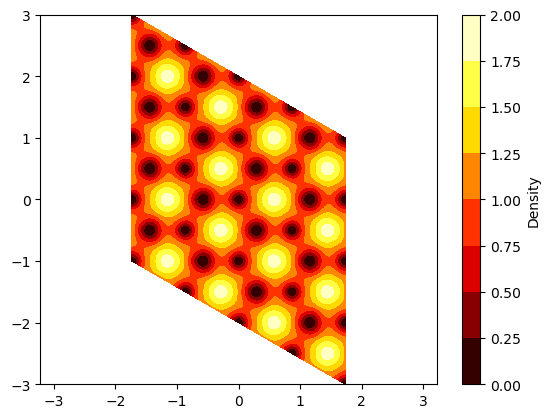

In [22]:
close("all")
tricontourf(rlist[:,1],rlist[:,2],densitylist,cmap = "hot")
colorbar(label = "Density")
axis("equal")
display(gcf())